 #### Load the appropriate libraries

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Read the data file

In [2]:
df = pd.read_csv("/home/moriah/Dropbox (Engineering Bar Ilan)/BigData_Python/profiles.csv")
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [10]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

## EDA
### 1. Does diet has effect on body type?

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


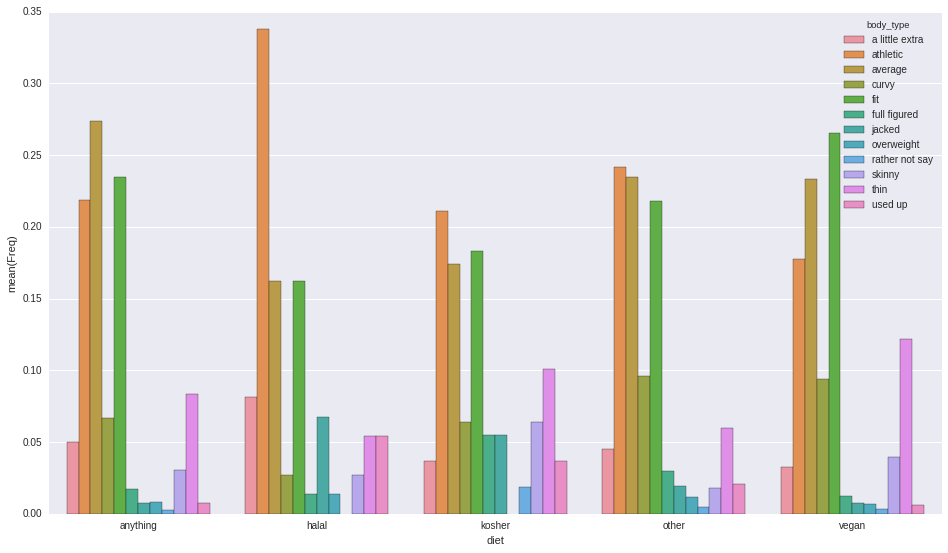

In [132]:
df.diet.unique()
## recode to less groups according to key word e.g vegan/vegeterian, Kosher, halal, other etc
df['diet'].replace(to_replace=".*veg.*", value="vegan",regex=True ,inplace=True)
df['diet'].replace(to_replace=".*kosher.*", value="kosher",regex=True ,inplace=True)
df['diet'].replace(to_replace=".*other.*", value="other",regex=True ,inplace=True)
df['diet'].replace(to_replace=".*halal.*", value="halal",regex=True ,inplace=True)
df['diet'].replace(to_replace=".*anything.*", value="anything",regex=True ,inplace=True)
        
df.diet.unique()

## deep copy the dataframe 
df_cp = df[['diet','body_type']].copy()
## remove the nan rows
df_cp.dropna(axis=0, how='any',inplace=True)

#create a reltaive frequency column - THERE MUST BE AN EASIER WAY!!!! :(
df_cp_grp = df_cp.groupby(['diet','body_type']).size().reset_index()
df_cp_grp_cnt = df_cp.groupby(['diet']).agg({'body_type': 'count'}).reset_index()

df_dict = dict(zip(df_cp_grp_cnt.diet,df_cp_grp_cnt.body_type))
df_cp_grp['Grp_Size'] = df_cp_grp['diet'].map(df_dict)
df_cp_grp['Freq'] = df_cp_grp[0]/df_cp_grp['Grp_Size']
df_cp_grp.head()
##################
f, ax = plt.subplots(figsize=(16, 9))

sns.barplot(data=df_cp_grp,x='diet',y='Freq',hue='body_type',ax=ax)

### Conclusion
#### Most of the participants describe themselves as athletic ,average or fit no matter what the diet is. However, there is some variation between the three dominat "body types" depending on the diet.  For exmaple, participants that eat halal mainly describe themselves as having athletic figure, while vegan mostly describe their body type as fit. 

### 2. Is the income dependent on the ethnicity and are ther differnces between genders?
#### First we have to remove the -1 index of 'rather not say'

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


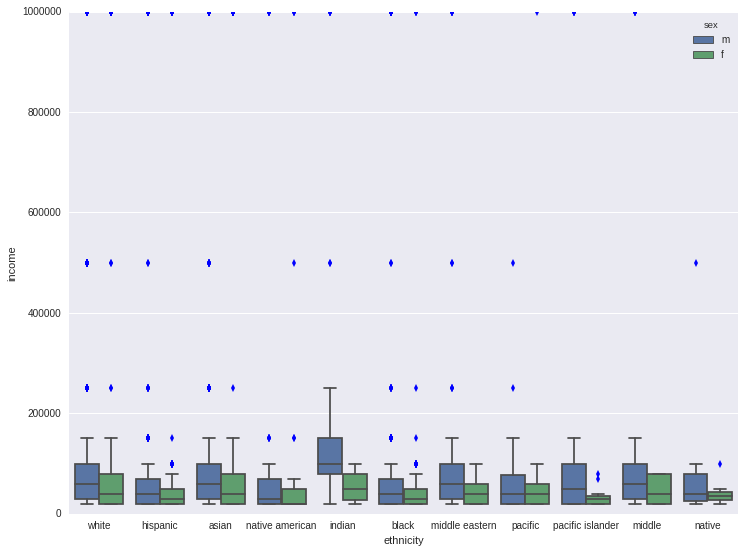

In [55]:
df_cp = df[['income','ethnicity','sex']].copy()
df_cp = df_cp[df_cp.income!=-1]
## For the sake of this example we will use only the first ethnicity mentioned
df_cp['ethnicity'] = df_cp['ethnicity'].astype(str).apply(lambda x: x.split(',')[0] if(len(x.split(','))>1) else x.split()[0])
df_cp['ethnicity'].unique()
## Maybe not so politcally corret however hispanic/latin will become hispanic
## 'other' and 'nan' will be removed since they are not informative
df_cp['ethnicity'].replace(to_replace=".*hispanic.*", value="hispanic",regex=True ,inplace=True)
df_cp.dropna(axis=0, how='any',inplace=True)
df_cp = df_cp[df_cp['ethnicity'] != 'other']
df_cp = df_cp[df_cp['ethnicity'] != 'nan']

df_cp.head()

f, ax = plt.subplots(figsize=(12, 9))
sns.boxplot(x="ethnicity", y="income", hue="sex", data=df_cp)


### Conclusion2
#### There are two main conclusions:
1. The income is somewhat higher in males vs female (as expected). However only in indian ethnicity males are paid significantly higher than females
2. The income of females of all ethnicities is quite the same. Indian males are paid higher that males from other etnicities

## 3. What are the jobs with higher income for male or female

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


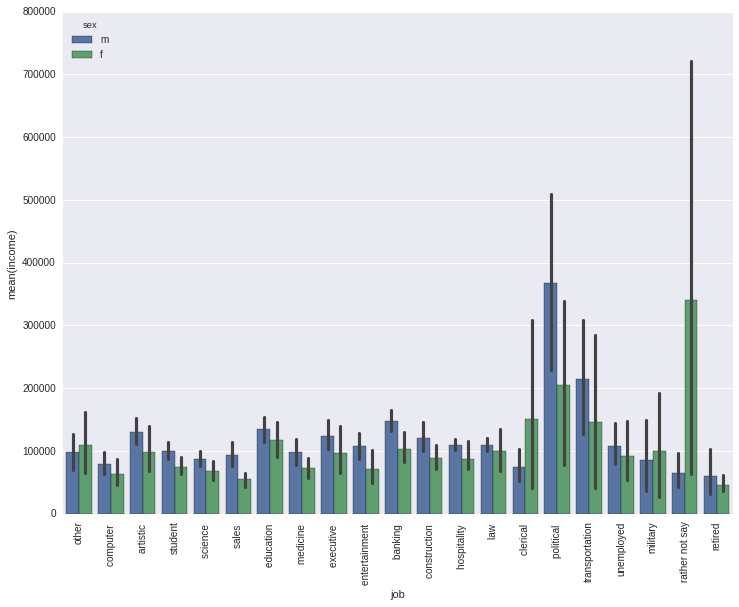

In [105]:
df['job'].unique()
# Again, taking only fisrt jov title 
df_cp = df[['job','income','sex']].copy()
df_cp['job'] = df_cp['job'].astype(str).apply(lambda x: x.split('/')[0])
## remove income -1
df_cp = df_cp[df_cp['income']!=-1]
## remome undefined job titles
df_cp = df_cp[df_cp['job']!='nan']
f, ax = plt.subplots(figsize=(12, 9))

g = sns.barplot(x="job", y="income", data=df_cp,hue='sex',capsize=.5)
g.set_xticklabels(labels=df_cp['job'].value_counts().index.tolist(),rotation=90)
#df_cp['job']

### Conclusion3
#### There are two main conclusions:
1. In most jobs males are paid a significantly more than females. The most significant difference is in politics,banking and transportation.

2. Female make a lot more than men in 'rather not say' job. I wonder what it is... 

In [ ]:
## 4. What is the connection between status and drinking

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


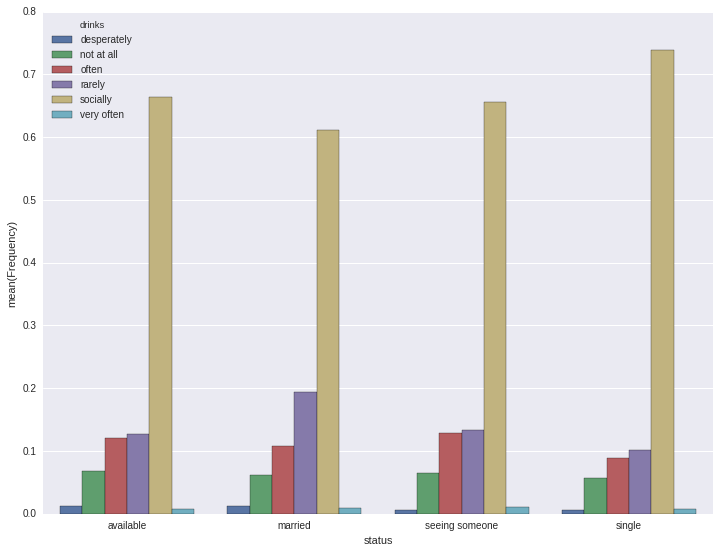

In [140]:
df_cross = pd.crosstab(index=df['status'], columns=df['drinks']).apply(lambda r: r/r.sum(), axis=1)
#Remove unknow status of drinks
df_cross= df_cross.drop('unknown')
# trasfom to structure that can be plotted with seaborn 
df_cross = df_cross.stack().reset_index().rename(columns={0:'Frequency'})
f, ax = plt.subplots(figsize=(12, 9))
## Still need to chande y axis label (it's not mean)
sns.barplot(x='status',y='Frequency',hue='drinks',data=df_cross)


### Conclusion4
#### All statuses seem to show rather simillar drinking habits.  Married paticipans may drink a bit less than other groups. 